# Boost revenue for big online store

Together with the marketing department, compiled a list of hypotheses that may help boost revenue.
I prioritize these hypotheses, launch an A/B test, and analyze the results.

### Table of contents
[Part 0. Imports](#Part-0.-Imports)

[Part 1. Prioritizing Hypotheses](#Part-1.-Prioritizing-Hypotheses)
- [The ICE framework to prioritize hypotheses](#The-ICE-framework-to-prioritize-hypotheses)
- [The RICE framework to prioritize hypotheses](#The-RICE-framework-to-prioritize-hypotheses)
- [Plotting graph](#Plotting-graph)
- [Conclusion of part 1](#Conclusion-of-part-1)

[Part 2. A/B Test Analysis](#Part-2.-A/B-Test-Analysis)
- [Step 1. Open files and prepare tables for analysis](#Step-1.-Open-files-and-prepare-tables-for-analysis)
 - [Conclusion step 1](#Conclusion-step-1)
- [Step 2. Analyze the A/B test](#Step-2.-Analyze-the-A/B-test)
 - [Graph cumulative revenue by group](#Graph-cumulative-revenue-by-group)
 - [Graph cumulative average order size by group](#Graph-cumulative-average-order-size-by-group)
 - [Graph the relative difference in cumulative average order size](#Graph-the-relative-difference-in-cumulative-average-order-size)
 - [Each group's conversion rate](#Each-group's-conversion-rate)
 - [Scatter chart of the number of orders per user](#Scatter-chart-of-the-number-of-orders-per-user)
 - [Scatter chart of order prices](#Scatter-chart-of-order-prices)
 - [The statistical significance of the difference in conversion between the groups using the raw data](#The-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data)
 - [The statistical significance of the difference in average order size between the groups using the raw data](#The-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data)
 - [The statistical significance of the difference in conversion between the groups using the filtered data](#The-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data)
 - [The statistical significance of the difference in average order size between the groups using the filtered data](#The-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-filtered-data)
- [Conclusion of part 2](#Conclusion-of-part-2)

## Part 0. Imports

In [13]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette='Set2')

## Part 1. Prioritizing Hypotheses

In [2]:
hypo = pd.read_csv('hypotheses_us.csv', sep=';')
hypo.rename(str.lower, axis='columns', inplace=True)
hypo['num'] = hypo.index.to_list()
hypo

,hypothesis,reach,impact,confidence,effort,num
0,Add two new channels for attracting traffic. T...,3,10,8,6,0
1,Launch your own delivery service. This will sh...,2,5,4,10,1
2,Add product recommendation blocks to the store...,8,3,7,3,2
3,Change the category structure. This will incre...,8,3,3,8,3
4,Change the background color on the main page. ...,3,1,1,1,4
5,Add a customer review page. This will increase...,3,2,2,3,5
6,Show banners with current offers and sales on ...,5,3,8,3,6
7,Add a subscription form to all the main pages....,10,7,8,5,7
8,Launch a promotion that gives users discounts ...,1,9,9,5,8


#### The ICE framework to prioritize hypotheses

In [3]:
hypo['ice'] = (hypo['impact'] * hypo['confidence']) / hypo['effort']
hypo.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,effort,num,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,8,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,0,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,7,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,6,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,2,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,1,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,5,1.333333
3,Change the category structure. This will incre...,8,3,3,8,3,1.125000
4,Change the background color on the main page. ...,3,1,1,1,4,1.000000


#### The RICE framework to prioritize hypotheses

In [4]:
hypo['rice'] = (hypo['reach'] * hypo['impact'] *
                hypo['confidence']) / hypo['effort']
hypo.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,effort,num,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,7,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,2,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,0,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,6,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,8,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,3,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,1,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,5,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,4,1.000000,3.0


#### Plotting graph

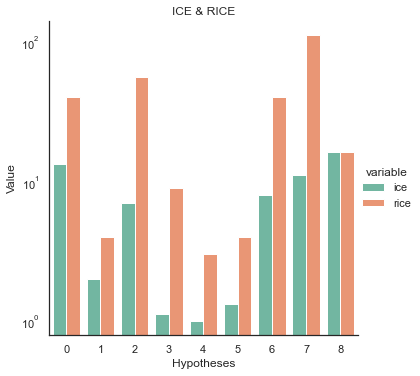

In [14]:
fig = hypo.melt(id_vars='num', value_vars=['ice', 'rice'])
sns.catplot(x="num",
            y="value",
            kind="bar",
            data=fig,
            hue="variable",
            log=True).set(xlabel='Hypotheses',
                          ylabel='Value',
                          title='ICE & RICE');

## Conclusion of part 1

RICE and ICE give us different metrics. Best hypotheses by ICE is 8, 0 and 7. By RICE 7, 2, 0. I think we should start from 7 or 0 becouse they are in the first 3 places in bouth metrics.

## Part 2. A/B Test Analysis
### Step 1. Open files and prepare tables for analysis

In [5]:
orders = pd.read_csv('orders_us.csv', parse_dates=['date'])
orders.info(memory_usage='deep')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
visits = pd.read_csv('visits_us.csv', parse_dates=['date'])
visits.info(memory_usage='deep')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x:
                                     orders[
                                         np.logical_and(orders['date'] <= x['date'],
                                                        orders['group'] == x['group'])
                                     ].agg(
                                         {'date': 'max',
                                          'group': 'max',
                                          'transactionId': pd.Series.nunique,
                                          'visitorId': pd.Series.nunique,
                                          'revenue': 'sum'}), axis=1
                                     ).sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(lambda x:
                                     visits[
                                         np.logical_and(visits['date'] <= x['date'],
                                                        visits['group'] == x['group'])
                                     ].agg(
                                         {'date': 'max',
                                          'group': 'max',
                                          'visits': 'sum'}), axis=1
                                     ).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group',
                          'orders', 'buyers', 'revenue', 'visits']
cumulativeData['conversion'] = cumulativeData['orders'] / \
    cumulativeData['visits']
cumulativeA = cumulativeData[cumulativeData['group']
                             == 'A'][['date', 'revenue', 'orders', 'conversion']]
cumulativeB = cumulativeData[cumulativeData['group']
                             == 'B'][['date', 'revenue', 'orders', 'conversion']]
cumulativeData

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


#### Conclusion step 1
All information loaded with shanged type. Made cumulative table for analysis.

### Step 2. Analyze the A/B test
#### Graph cumulative revenue by group

In [27]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

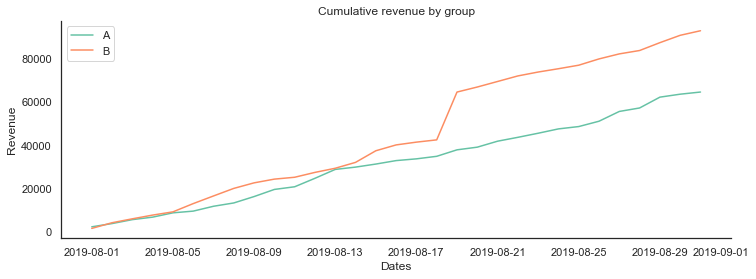

In [36]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="date", y="revenue", label='A', data=cumulativeA)
sns.lineplot(x="date", y="revenue", label='B', data=cumulativeB).set(xlabel='Dates',
                                                                     ylabel='Revenue',
                                                                     title='Cumulative revenue by group')
sns.despine()
plt.legend();

The graph shows a steady increase in income. Group B has a splash. Perhaps a large order or an expensive purchase.
#### Graph cumulative average order size by group

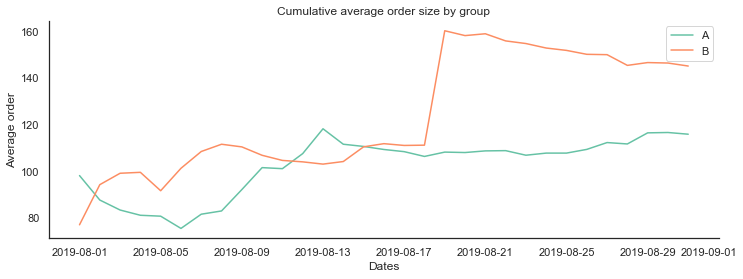

In [16]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=cumulativeA['date'],
             y=cumulativeA['revenue']/cumulativeA['orders'],
             label='A')
sns.lineplot(x=cumulativeB['date'],
             y=cumulativeB['revenue']/cumulativeB['orders'],
             label='B').set(xlabel='Dates',
                            ylabel='Average order',
                            title='Cumulative average order size by group')
sns.despine()
plt.legend();

The average purchase price of group A and B will stabilize by the middle of the test in the region of 100 - 120 dollars. In the second half, group B shows a sharp surge to 160 and then slowly decreases. Perhaps without this sharp jump, B would be worse than A.
#### Graph the relative difference in cumulative average order size

In [17]:
mergedCumulative = cumulativeA.merge(cumulativeB,
                                     on='date',
                                     how='left',
                                     suffixes=['A', 'B'])
mergedCumulative.head()

,date,revenueA,ordersA,conversionA,revenueB,ordersB,conversionB
0,2019-08-01,2356.8,24,0.033380,1620.0,21,0.029453
1,2019-08-02,3860.3,44,0.032885,4243.8,45,0.034776
2,2019-08-03,5675.5,68,0.036856,6050.6,61,0.033833
3,2019-08-04,6822.1,84,0.032787,7767.9,78,0.030315
4,2019-08-05,8810.2,109,0.032851,9262.9,101,0.030793


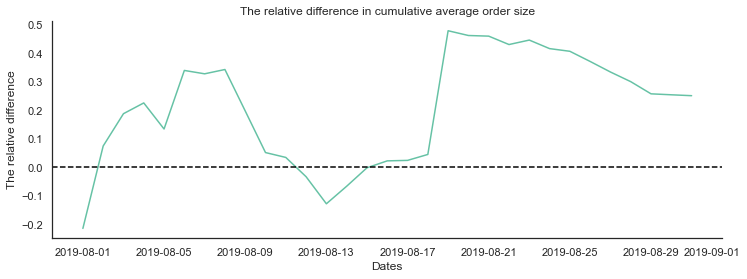

In [19]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=mergedCumulative['date'],
             y=(mergedCumulative['revenueB']/mergedCumulative['ordersB'])
             / (mergedCumulative['revenueA']/mergedCumulative['ordersA'])-1).set(xlabel='Dates',
                                                                                 ylabel='The relative difference',
                                                                                 title='The relative difference in cumulative average order size')
sns.despine()
plt.axhline(y=0, color='black', linestyle='--');

Average order size shows unstable behavior. After a surge in the second half, group B shows a decline. Without the outlier, Group B would be worse than A.

#### Each group's conversion rate

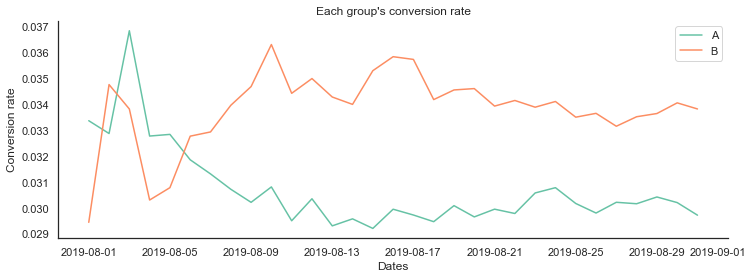

In [20]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='date', y='conversion', data=cumulativeA, label='A')
sns.lineplot(x='date', y='conversion', data=cumulativeB, label='B').set(xlabel='Dates',
                                                                        ylabel='Conversion rate',
                                                                        title='Each group\'s conversion rate')
sns.despine()
plt.legend();

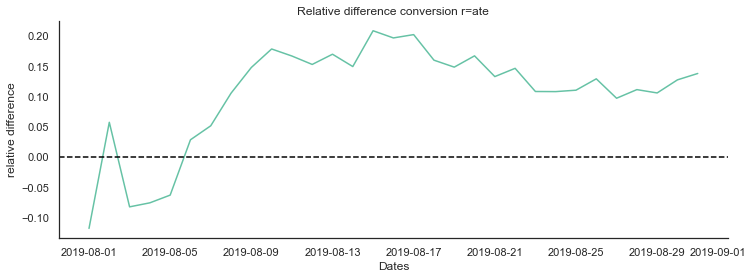

In [21]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=mergedCumulative['date'],
             y=mergedCumulative['conversionB']/mergedCumulative['conversionA']-1).set(xlabel='Dates',
                                                                                      ylabel='relative difference',
                                                                                      title='Relative difference conversion r=ate')
sns.despine()
plt.axhline(y=0, color='black', linestyle='--');

Almost from the very beginning, Group B has a higher conversion rate than Group A.
#### Scatter chart of the number of orders per user

In [22]:
ordersByUsers = orders.drop(['group', 'revenue'],
                            axis=1).groupby('visitorId',
                                            as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


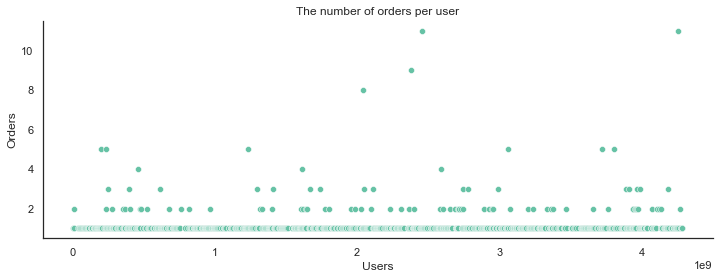

In [23]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=ordersByUsers, x='visitorId', y='orders').set(xlabel='Users',
                                                                   ylabel='Orders',
                                                                   title='The number of orders per user')
sns.despine();


Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [24]:
p = np.percentile(ordersByUsers['orders'], [95, 99])
print(
    f'The 95th and 99th percentiles of the number of order prices is {p[0]} and {p[1]}')

The 95th and 99th percentiles of the number of order prices is 2.0 and 4.0


Not more than 5% of users placed more than 2 orders, and 1% of users made more than 4. It would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies on that basis.
#### Scatter chart of order prices

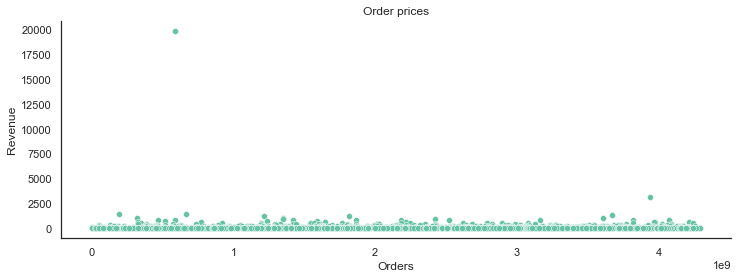

In [25]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=orders.sort_values(by='revenue', ascending=False),
                x='transactionId',
                y='revenue').set(xlabel='Orders',
                                 ylabel='Revenue',
                                 title='Order prices')
sns.despine();

In [29]:
p = np.percentile(orders['revenue'], [95, 99])
print(f'The 95th and 99th percentiles of order prices is {p[0]} and {p[1].round(2)}')

The 95th and 99th percentiles of order prices is 435.54 and 900.9


Not more than 5% of users spent more than 435 dollars, and 1% of users spent more than 900. It would be reasonable to set 700 dollarsas the lower limit and to filter anomalies on that basis.
#### The statistical significance of the difference in conversion between the groups using the raw data

In [30]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId',
                                                        as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId',
                                                        as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(
                         0,
                         index=np.arange(
                             visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])),
                         name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(
                         0,
    index=np.arange(
        visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])),
                         name='orders')], axis=0)

<b>Null hypothesis</b> - no difference in statistically significant.<br>
<b>Alternative hypothesis</b> - difference in statistically significant.

In [31]:
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print("The relative conversion is {0:.1f}%".format(
    (sampleB.mean()/sampleA.mean()-1)*100))

p-value: 0.008
Null hypothesis rejected: the difference is statistically significant
The relative conversion is 13.8%


The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%.
#### The statistical significance of the difference in average order size between the groups using the raw data

In [32]:
results = st.mannwhitneyu(
    orders[orders.group == 'A']['revenue'], orders[orders.group == 'B']['revenue'])

print('p-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print("The relative difference {0:.1f}%".format(
    (orders[orders.group == 'B']['revenue'].mean()/orders[orders.group == 'A']['revenue'].mean()-1)*100))

p-value: 0.346
Failed to reject the null hypothesis: we can't make conclusions about the difference
The relative difference 25.2%


There are no statistically significant differences in average order size. Nonetheless, the relative difference for group B is for 25% bigger than it is for group A.

#### The statistical significance of the difference in conversion between the groups using the filtered data

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']],
                                axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(f'We have {abnormalUsers.shape[0]} anomalous users in total.')
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() -
                                  len(ordersByUsersA['orders'])), name='orders')], axis=0
)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() -
                                  len(ordersByUsersB['orders'])), name='orders')], axis=0
)

We have 61 anomalous users in total.


In [34]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print("The relative conversion is {0:.1f}%".format(
    (sampleB.mean()/sampleA.mean()-1)*100))

p-value: 0.005
Null hypothesis rejected: the difference is statistically significant
The relative conversion is 13.8%


The results for conversion almost didn't change.

#### The statistical significance of the difference in average order size between the groups using the filtered data

In [35]:
results = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders.visitorId.isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders.visitorId.isin(abnormalUsers)))]['revenue']
)

print('p-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print("The relative difference {0:.1f}%".format(
    (orders[np.logical_and(orders['group'] == 'B',
                           np.logical_not(orders.visitorId.isin(abnormalUsers)))]['revenue'].mean() /
     orders[np.logical_and(orders['group'] == 'A',
                           np.logical_not(orders.visitorId.isin(abnormalUsers)))]['revenue'].mean() - 1)*100))

p-value: 0.455
Failed to reject the null hypothesis: we can't make conclusions about the difference
The relative difference 1.1%


The p-value increased, but now the difference between the segments is 1.1% instead of 25.2%.

## Conclusion of part 2
Raw and filtered data revealed any statistically significant differences in conversion between the groups.
General conclusion of test is increase conversion rate of group B (The relative conversion is 13.8%). This is good for future, but not give revenue right now. No  diferent of avarange order cost bitween groups (The relative difference 1.1%). cumulative average order of group B go down. Without splash group B would be worse. We can continue test and see if the changes make people buy more and more expensive in group b. Or we can stop the test. Accept group B changes for everyone and wait for an increase in conversions.